# Plotly Maps

In [1]:
#Imports
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
import numpy as np
from shapely.geometry import Point
import geopandas as gpd

In [2]:
# load data into a dataframe
path = '../data/GP_Alumni_List_Cleaned.csv'
df = pd.read_csv(path).copy()

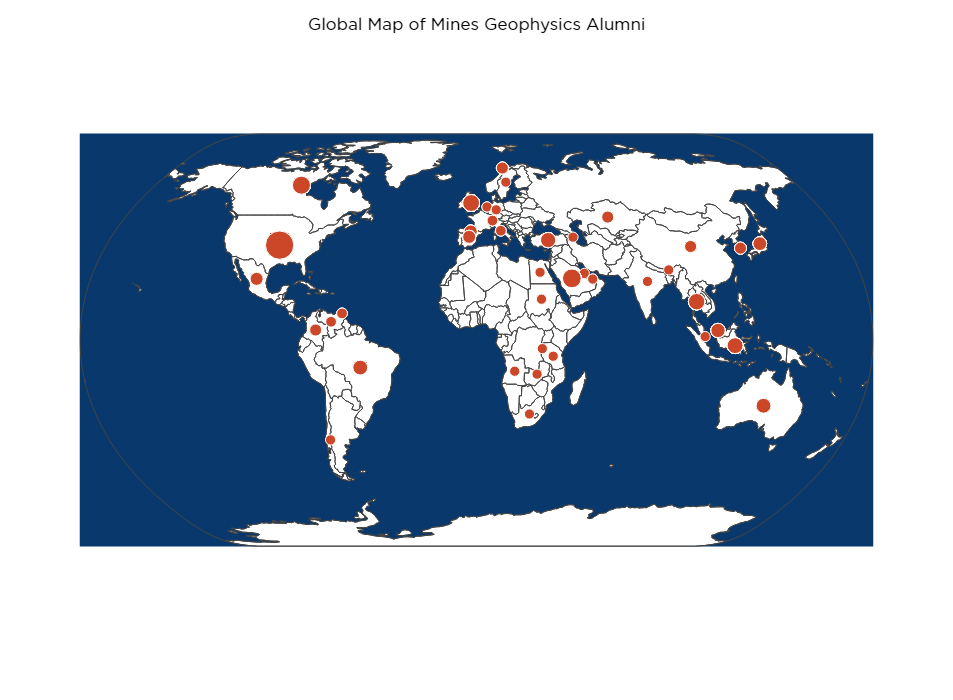

In [41]:
import pandas as pd
import plotly.express as px

path = '../data/GP_Alumni_List_Cleaned.csv'
df = pd.read_csv(path).copy()

# Replace latitude and longitude values for all 'United States' entries with default values
default_usa_lat = 37.0902  # Default latitude for USA
default_usa_lon = -95.7129  # Default longitude for USA
df.loc[df['Country'] == 'United States', ['Latitude', 'Longitude']] = default_usa_lat, default_usa_lon

# Compute central coordinates for each country
central_coords = df.groupby('Country').agg({'Latitude': 'mean', 'Longitude': 'mean'}).reset_index()

# Compute size of bubbles based on the logarithm of the number of entries for each country
df['Size'] = np.log(df.groupby('Country')['Country'].transform('count'))

# Define a threshold value for the minimum size of bubbles
min_size_threshold = 1  # You can adjust this threshold as needed

# Set a minimum size for bubbles that fall below the threshold
df.loc[df['Size'] < min_size_threshold, 'Size'] = min_size_threshold

# Compute number of entries for each country (assuming 'Alumni' column)
alumni_counts = df.groupby('Country').size().reset_index(name='Alumni')

# Merge alumni counts back into the original DataFrame
df_merged = df.merge(alumni_counts, on='Country', how='left')

# Create an interactive scatter plot using Plotly
fig = px.scatter_geo(df_merged, lat='Latitude', lon='Longitude', color='Country', size='Size',
                     hover_name='Country', projection='natural earth',
                     hover_data={'Country': False, 'Size': False, 'Latitude': False, 'Longitude': False,
                                 'Alumni': True})

# Set every country bubble to be orange
fig.update_traces(marker=dict(color='#CC4628', opacity=1))

# Customize layout
fig.update_layout(title='Global Map of Mines Geophysics Alumni',
                  geo=dict(showcountries=True, 
                           landcolor='white',
                           bgcolor='#09396C'),
                  font=dict(family='Gotham', size=12, color='black'),
                  title_x=0.5, # Position the title at the center horizontally
                  height=700, 
                  width=1000,
                  showlegend=False)  # Position the legend (countries list) at the top left corner
# Show the plot
fig.show()

# Export the plot as an HTML file
fig.write_html('../figures/Global_GP_Alum_Map')

In [33]:
df = pd.read_csv(path).copy()

# Filter out rows where 'State' is not provided
df = df.dropna(subset=['State'])

state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'PR': 'Puerto Rico',
    'AA': 'Armed Forces Americas'
}

# Replace state acronyms with full names in the DataFrame
df['State'] = df['State'].map(state_mapping)

# Filter data to include only US states
df_us = df[df['Country'] == 'United States']

df

,Affiliation,PrefClassYear,Degrees,State,Country,Latitude,Longitude
0,Alumni,1983.0,BSc,Colorado,United States,39.5501,-105.7821
1,Alumni,1995.0,BSc,Colorado,United States,39.5501,-105.7821
4,Alumni,1982.0,BSc,Oklahoma,United States,35.5653,-96.9289
5,Alumni,1983.0,BSc,Colorado,United States,39.5501,-105.7821
6,Alumni,1999.0,MSc,Wyoming,United States,42.7560,-107.3025
...,...,...,...,...,...,...,...
2225,Alumni,2012.0,BSc,Colorado,United States,39.5501,-105.7821
2226,Alumni,1982.0,BSc,Texas,United States,31.0545,-97.5635
2227,Alumni,1981.0,BSc,Utah,United States,40.1500,-111.8624
2228,Alumni,2019.0,BSc,Colorado,United States,39.5501,-105.7821


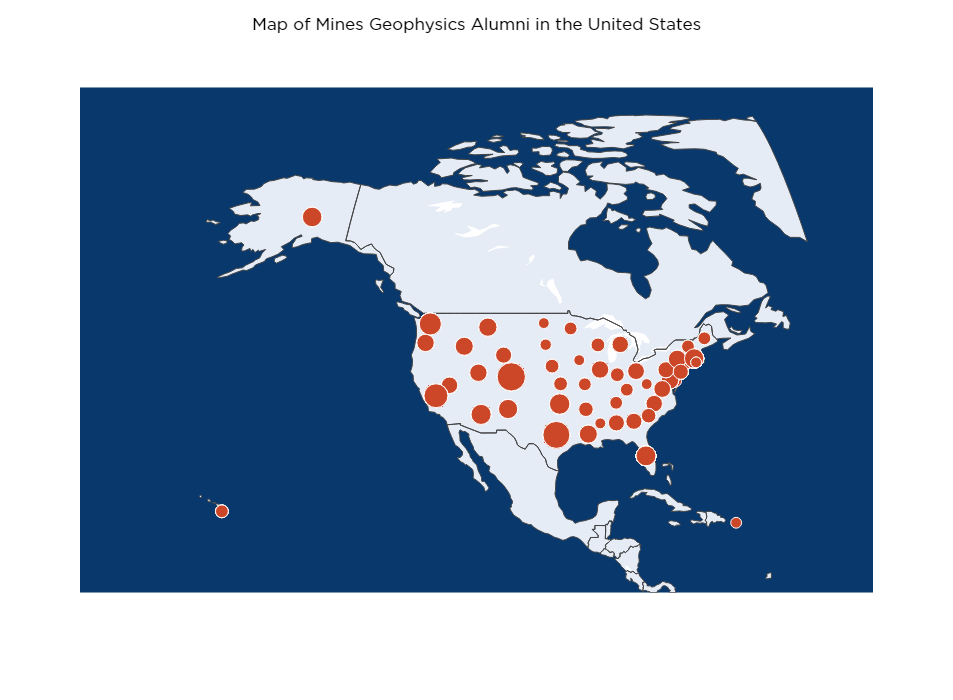

In [40]:
import plotly.graph_objects as go

# Compute size of bubbles based on the logarithm of the number of entries for each country
df['Size'] = np.log(df.groupby('State')['State'].transform('count'))

# Define a threshold value for the minimum size of bubbles
min_size_threshold = 1  # You can adjust this threshold as needed

# Set a minimum size for bubbles that fall below the threshold
df.loc[df['Size'] < min_size_threshold, 'Size'] = min_size_threshold

# Compute number of entries for each country (assuming 'Alumni' column)
alumni_counts = df.groupby('State').size().reset_index(name='Alumni')

# Merge alumni counts back into the original DataFrame
df_merged = df.merge(alumni_counts, on='State', how='left')

# Create an interactive scatter plot using Plotly
fig = px.scatter_geo(df_merged, lat='Latitude', lon='Longitude', color='Country', size='Size',
                     hover_name='State', projection='natural earth',
                     hover_data={'State': False, 'Size': False, 'Latitude': False, 'Longitude': False,
                                 'Alumni': True})

# Set every country bubble to be orange
fig.update_traces(marker=dict(color='#CC4628', opacity=1))

# Customize layout
fig.update_layout(title='Map of Mines Geophysics Alumni in the United States',
                  geo=dict(scope='north america', showsubunits=True, subunitcolor="White", 
                           bgcolor='#09396C'),
                  font=dict(family='Gotham', size=12, color='black'),
                  title_x=0.5, # Position the title at the center horizontally
                  height=700, 
                  width=1000,
                  showlegend=False)  # Position the legend (countries list) at the top left corner

# Show the plot
fig.show()

# Export the plot as an HTML file
fig.write_html('../figures/US_GP_Alum_Map')